In [1]:
%env XLA_PYTHON_CLIENT_PREALLOCATE=false #Caleb's magical words to prevent memory error, disables JAX?

env: XLA_PYTHON_CLIENT_PREALLOCATE=false #Caleb's magical words to prevent memory error, disables JAX?


In [2]:
import keypoint_moseq
import keypoint_moseq as kpms
print(keypoint_moseq.__version__)#should ONLY print 0.5 version

0.5.0


In [3]:
import os
import glob
import h5py
import pandas as pd
import numpy as np
import copy

#save as csv code
# snapshot detector path
h5_path = "/home/nj35/MRes/TDP videos/pre-induction/EPM/fixed_Trial_6_superanimal_topviewmouse_snapshot-detector-004_snapshot-004.h5"
epm_h5 = pd.read_hdf(h5_path)
# .csv output file path
csv_path = "/home/nj35/MRes/TDP videos/pre-induction/EPM/fixed_Trial_6_superanimal_topviewmouse_snapshot-detector-004_snapshot-004.csv"
# Save the DataFrame as a CSV file
epm_h5.to_csv(csv_path, index=True)

print(f"CSV file saved at: {csv_path}")

In [4]:
#for already trained model, load project directly, config file and pca
project_dir = "/home/nj35/MRes/moseq_project/OFT_model"

In [5]:
config = lambda: kpms.load_config(project_dir)

In [7]:
# Define bodyparts and skeleton
bodyparts = [
    'nose', 'left_ear', 'right_ear', 'left_ear_tip', 'right_ear_tip',
    'left_eye', 'right_eye', 'neck', 'mid_back', 'mouse_center',
    'mid_backend', 'mid_backend2', 'mid_backend3', 'tail_base',
    'tail1', 'tail2', 'tail3', 'tail4', 'tail5', 'left_shoulder',
    'left_midside', 'left_hip', 'right_shoulder', 'right_midside',
    'right_hip', 'tail_end', 'head_midpoint'
]

skeleton = [
    ['nose', 'left_eye'],
    ['nose', 'right_eye'],
    ['nose', 'left_ear'],
    ['nose', 'right_ear'],
    ['left_eye', 'right_eye'],
    ['left_ear', 'left_ear_tip'],
    ['right_ear', 'right_ear_tip'],
    ['left_ear', 'head_midpoint'],
    ['right_ear', 'head_midpoint'],
    ['neck', 'left_shoulder'],
    ['neck', 'right_shoulder'],
    ['neck', 'mid_back'],
    ['left_shoulder', 'left_hip'],
    ['right_shoulder', 'right_hip'],
    ['left_hip', 'left_midside'],
    ['right_hip', 'right_midside'],
    ['left_midside', 'mid_back'],
    ['right_midside', 'mid_back'],
    ['mid_back', 'mouse_center'],
    ['mouse_center', 'mid_backend'],
    ['mouse_center', 'mid_backend2'],
    ['mouse_center', 'mid_backend3'],
    ['mid_backend', 'mid_backend2'],
    ['mid_backend2', 'mid_backend3'],
    ['mid_backend2', 'tail_base'],
    ['mid_backend3', 'tail_base'],
    ['tail_base', 'tail1'],
    ['tail1', 'tail2'],
    ['tail2', 'tail3'],
    ['tail3', 'tail4'],
    ['tail4', 'tail5'],
    ['tail5', 'tail_end'],
    ['head_midpoint', 'neck']
]

In [6]:
# Specify video directory
video_dir = [
    '/home/nj35/MRes/TDP videos/Cohort 1/pre-induction/OFT/crop',
    '/home/nj35/MRes/TDP videos/Cohort 1/post-induction-w1/OFT/crop',
    '/home/nj35/MRes/TDP videos/Cohort 1/post-induction-w2/OFT/crop',
    '/home/nj35/MRes/TDP videos/Cohort 3/pre-induction/OFT/crop',
    '/home/nj35/MRes/TDP videos/Cohort 3/post-induction-w1/OFT/crop',
    '/home/nj35/MRes/TDP videos/Cohort 3/post-induction-w2/OFT/crop'
] # Replace with the path to your videos

In [8]:
# Set up the project
kpms.setup_project(
    overwrite=True,
    project_dir=project_dir, # decides where demo project is created
    video_dir=video_dir,
    bodyparts=bodyparts,
    skeleton=skeleton
)

In [9]:
kpms.update_config(
    project_dir,
    video_dir=[
    '/home/nj35/MRes/TDP videos/Cohort 1/pre-induction/OFT/crop',
    '/home/nj35/MRes/TDP videos/Cohort 1/post-induction-w1/OFT/crop',
    '/home/nj35/MRes/TDP videos/Cohort 1/post-induction-w2/OFT/crop',
    '/home/nj35/MRes/TDP videos/Cohort 3/pre-induction/OFT/crop',
    '/home/nj35/MRes/TDP videos/Cohort 3/post-induction-w1/OFT/crop',
    '/home/nj35/MRes/TDP videos/Cohort 3/post-induction-w2/OFT/crop'],
    anterior_bodyparts=["nose"],
    posterior_bodyparts=["tail_base"],
    use_bodyparts = [
    "nose",
    "head_midpoint",
    "left_ear",
    "right_ear",
    "neck",
    "mid_back",
    "mouse_center",
    "mid_backend2",
    "tail_base"],
)

In [9]:
#load data (e.g from DeepLabCut)
keypoint_data_path = [
    '/home/nj35/MRes/TDP videos/Cohort 1/pre-induction/OFT/crop',
    '/home/nj35/MRes/TDP videos/Cohort 1/post-induction-w1/OFT/crop',
    '/home/nj35/MRes/TDP videos/Cohort 1/post-induction-w2/OFT/crop',
    '/home/nj35/MRes/TDP videos/Cohort 3/pre-induction/OFT/crop',
    '/home/nj35/MRes/TDP videos/Cohort 3/post-induction-w1/OFT/crop',
    '/home/nj35/MRes/TDP videos/Cohort 3/post-induction-w2/OFT/crop'
] # can be a file, a directory, or a list of files

In [14]:
# Function to find all .h5 files in specified directories
def find_h5_files(keypoint_data_path):
    h5_files = []  
    for directory in keypoint_data_path:
        pattern = os.path.join(directory, '*.h5')  # Look only in the specified folders (no recursion)
        h5_files.extend(glob.glob(pattern))  
    return h5_files

In [15]:
# Get list of .h5 files from the given directories
h5_files = find_h5_files(keypoint_data_path)
print(f"Number of .h5 files found: {len(h5_files)}")
print("Found .h5 files:", h5_files)
#should be 37 for OFT

Number of .h5 files found: 37
Found .h5 files: ['/home/nj35/MRes/TDP videos/Cohort 1/pre-induction/OFT/crop/pre-induction_OFT_fixed_Trial 6 - crop_superanimal_topviewmouse_snapshot-fasterrcnn_mobilenet_v3_large_fpn-004_snapshot-hrnet_w32-004.h5', '/home/nj35/MRes/TDP videos/Cohort 1/pre-induction/OFT/crop/pre-induction_OFT_fixed_Trial 2 - crop_superanimal_topviewmouse_snapshot-fasterrcnn_mobilenet_v3_large_fpn-004_snapshot-hrnet_w32-004.h5', '/home/nj35/MRes/TDP videos/Cohort 1/pre-induction/OFT/crop/pre-induction_OFT_fixed_Trial 9 - crop_superanimal_topviewmouse_snapshot-fasterrcnn_mobilenet_v3_large_fpn-004_snapshot-hrnet_w32-004.h5', '/home/nj35/MRes/TDP videos/Cohort 1/pre-induction/OFT/crop/pre-induction_OFT_fixed_Trial 4 - crop_superanimal_topviewmouse_snapshot-fasterrcnn_mobilenet_v3_large_fpn-004_snapshot-hrnet_w32-004.h5', '/home/nj35/MRes/TDP videos/Cohort 1/pre-induction/OFT/crop/pre-induction_OFT_fixed_Trial 8 - crop_superanimal_topviewmouse_snapshot-fasterrcnn_mobilenet_v3

In [10]:
### Caleb's advice for excluding likelihoods <0.3 including when mouse in in dark and not recognised

coordinates, confidences, bodyparts = kpms.load_keypoints(keypoint_data_path, 'deeplabcut', recursive=False, extension='.h5')

coordinates = {k : np.where(confidences[k][:,:,None] < 0.3, np.nan, coordinates[k]) for k in coordinates} #changes values less than 0.6 to remove NaN
#format data
data, metadata = kpms.format_data(coordinates, confidences, **config()) #format data for analysing

Loading keypoints: 100%|████████████████| 37/37 [00:03<00:00, 10.03it/s]


>=90.0% of variance exlained by 5 components.


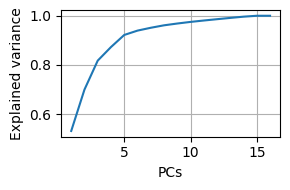

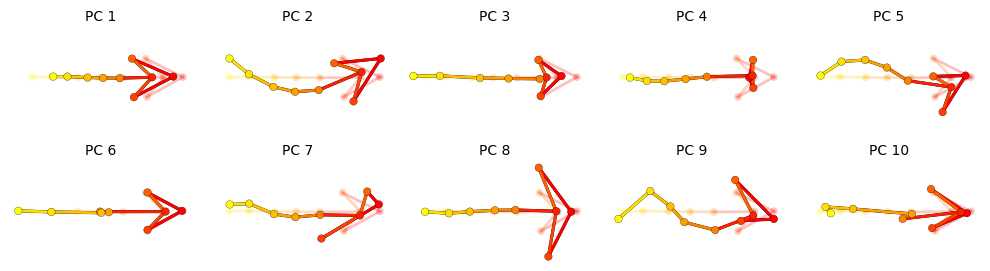

In [17]:
pca = kpms.fit_pca(**data, **config())
kpms.save_pca(pca, project_dir)

kpms.print_dims_to_explain_variance(pca, 0.9)
kpms.plot_scree(pca, project_dir=project_dir)
kpms.plot_pcs(pca, project_dir=project_dir, **config())

In [18]:
kpms.update_config(project_dir, latent_dim=5)

In [19]:
model = kpms.init_model(data, pca=pca, **config())

Outputs will be saved to
/home/nj35/MRes/moseq_project/OFT_model/2025_04_26-10_38_05


 49%|█████████████████▏                 | 25/51 [02:04<02:06,  4.87s/it]

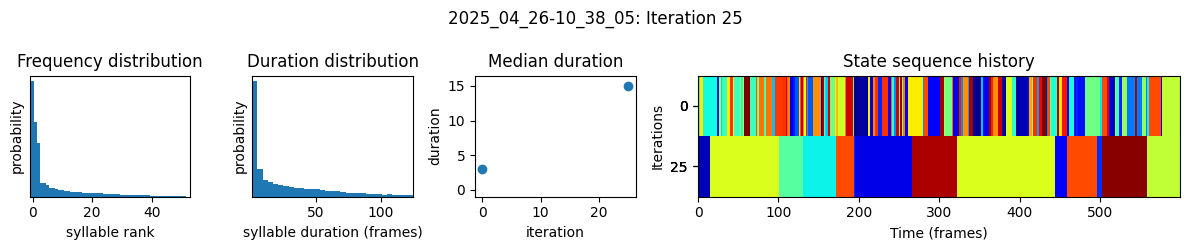

 98%|██████████████████████████████████▎| 50/51 [04:06<00:04,  4.88s/it]

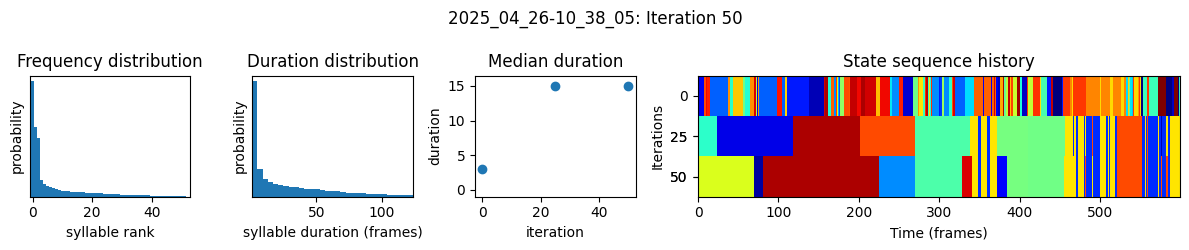

100%|███████████████████████████████████| 51/51 [04:12<00:00,  4.95s/it]


In [20]:
# optionally modify kappa
model = kpms.update_hypparams(model, kappa=5e6) #originally 1e4 for 20 median frames at 50 fps = 400ms syllable duration. 2e4 is 800ms?

num_ar_iters = 50

model, model_name = kpms.fit_model( #you can change model_name for AR-HMM which links to full model
    model, data, metadata, project_dir,
    ar_only=True, num_iters=num_ar_iters)

In [7]:
# load model_5e6_1e6 checkpoint
model, data, metadata, current_iter = kpms.load_checkpoint(project_dir, model_name="model_5e6_1e6")

Outputs will be saved to
/home/nj35/MRes/moseq_project/OFT_model/model_5e6_1e6


  5%|█▌                              | 25/501 [04:52<1:26:02, 10.85s/it]

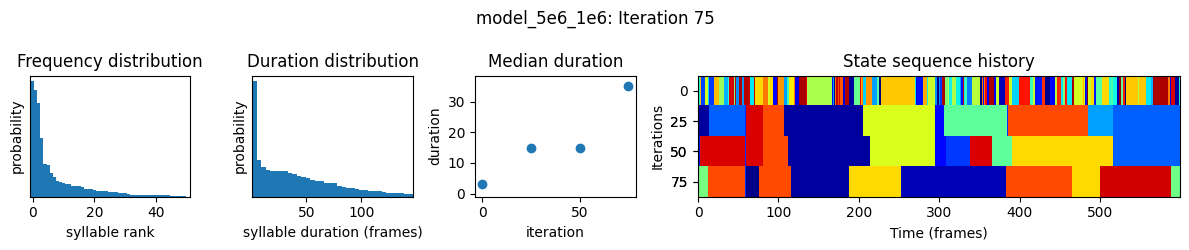

 10%|███▏                            | 50/501 [09:25<1:21:41, 10.87s/it]

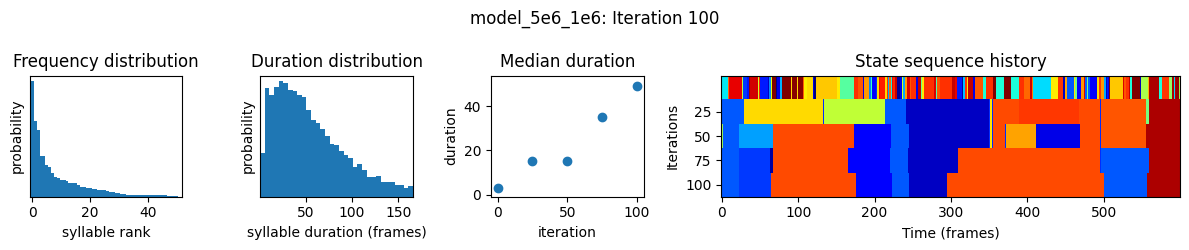

 15%|████▊                           | 75/501 [13:57<1:17:05, 10.86s/it]

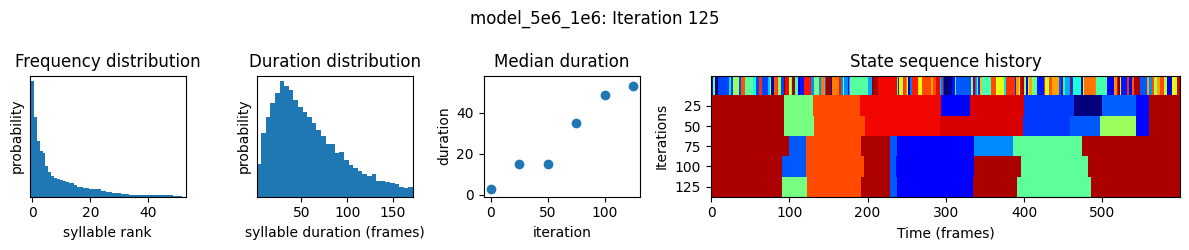

 20%|██████▏                        | 100/501 [18:29<1:12:36, 10.87s/it]

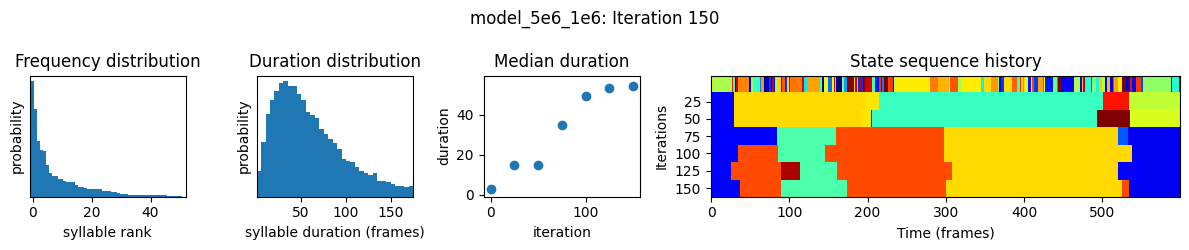

 25%|███████▋                       | 125/501 [23:01<1:07:59, 10.85s/it]

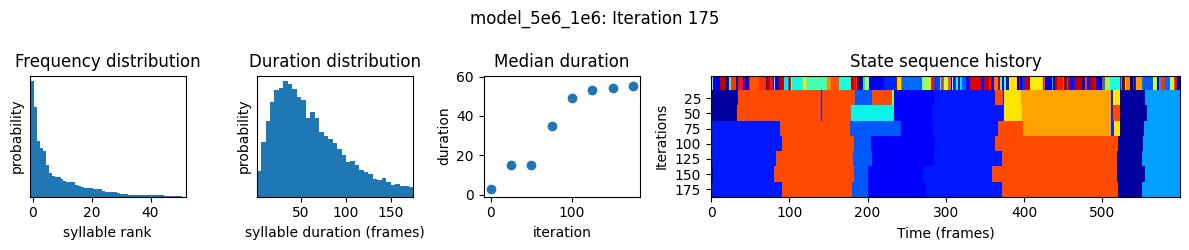

 30%|█████████▎                     | 150/501 [27:34<1:03:30, 10.86s/it]

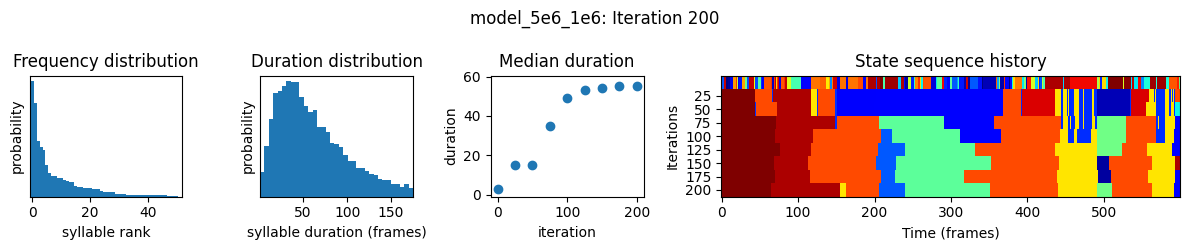

 35%|███████████▌                     | 175/501 [32:06<59:02, 10.87s/it]

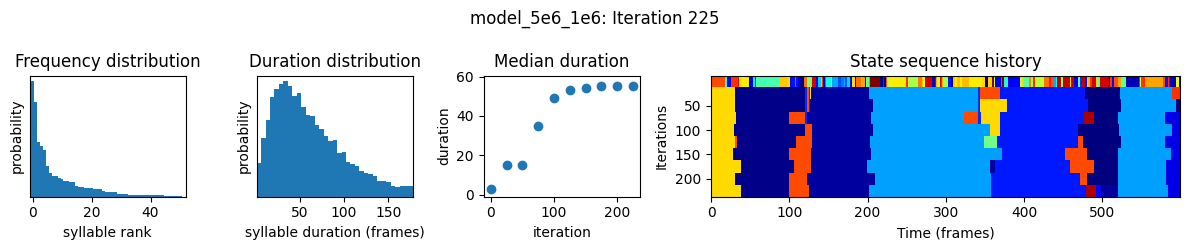

 40%|█████████████▏                   | 200/501 [36:38<54:24, 10.84s/it]

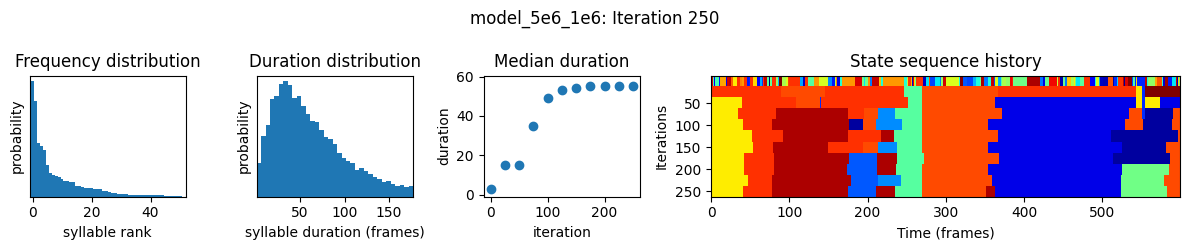

 45%|██████████████▊                  | 225/501 [41:11<49:56, 10.86s/it]

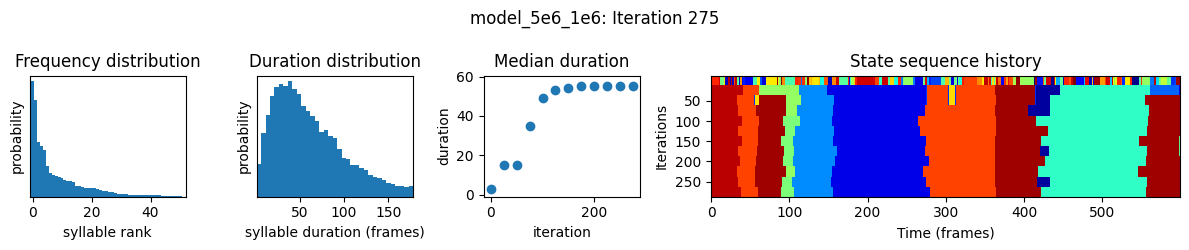

 50%|████████████████▍                | 250/501 [45:43<45:22, 10.84s/it]

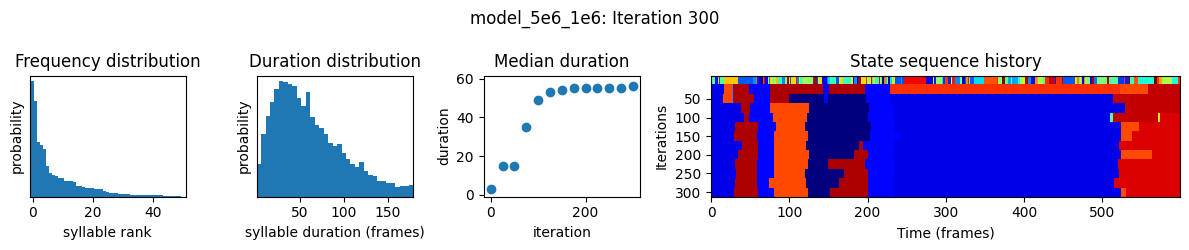

 55%|██████████████████               | 275/501 [50:15<40:48, 10.83s/it]

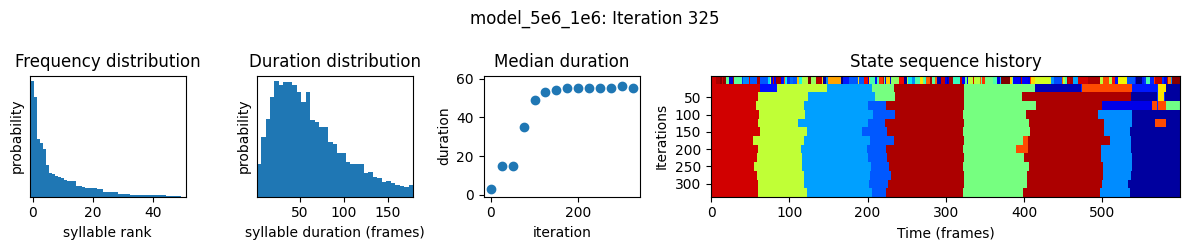

 60%|███████████████████▊             | 300/501 [54:47<36:20, 10.85s/it]

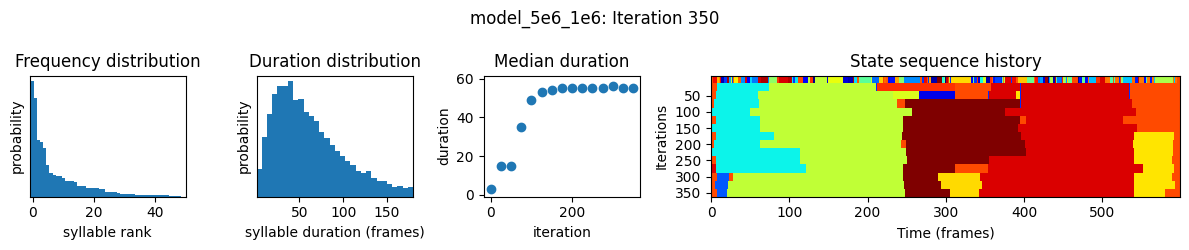

 65%|█████████████████████▍           | 325/501 [59:19<31:50, 10.85s/it]

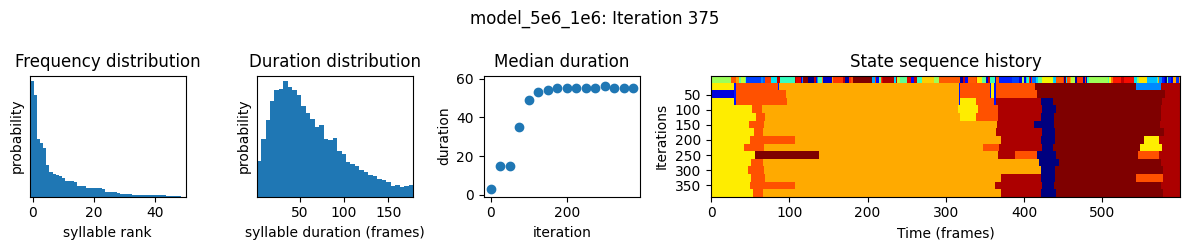

 70%|█████████████████████▋         | 350/501 [1:03:52<27:15, 10.83s/it]

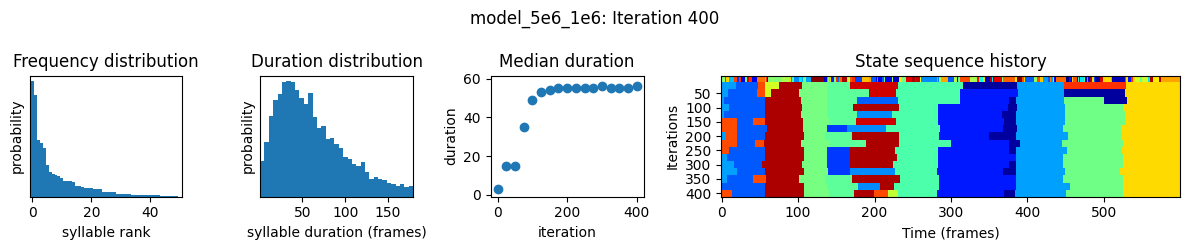

 75%|███████████████████████▏       | 375/501 [1:08:24<22:46, 10.84s/it]

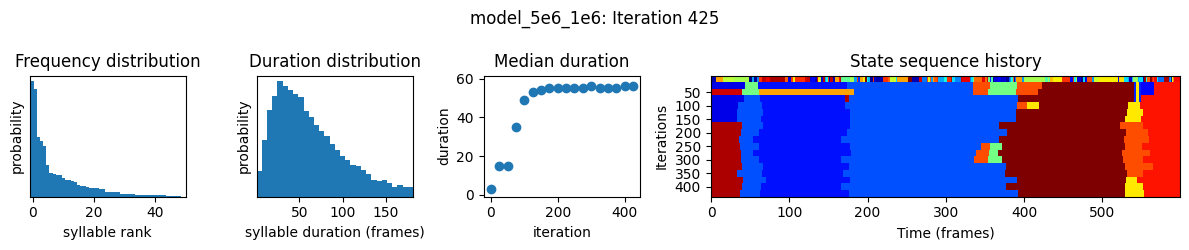

 80%|████████████████████████▊      | 400/501 [1:12:56<18:13, 10.83s/it]

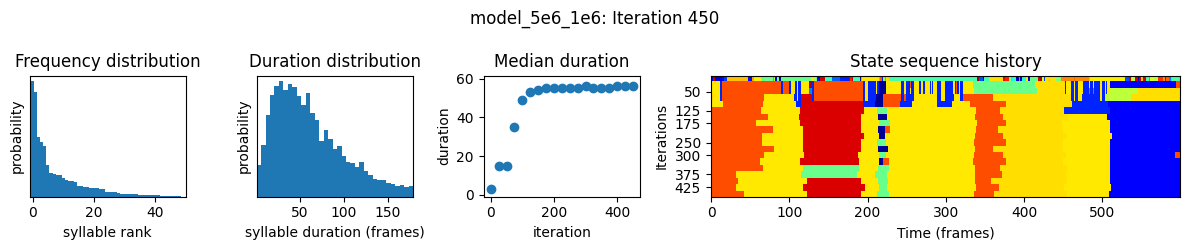

 85%|██████████████████████████▎    | 425/501 [1:17:27<13:43, 10.83s/it]

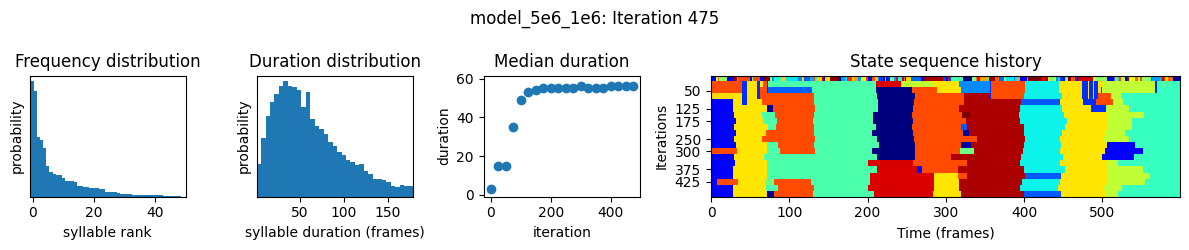

 90%|███████████████████████████▊   | 450/501 [1:21:59<09:12, 10.83s/it]

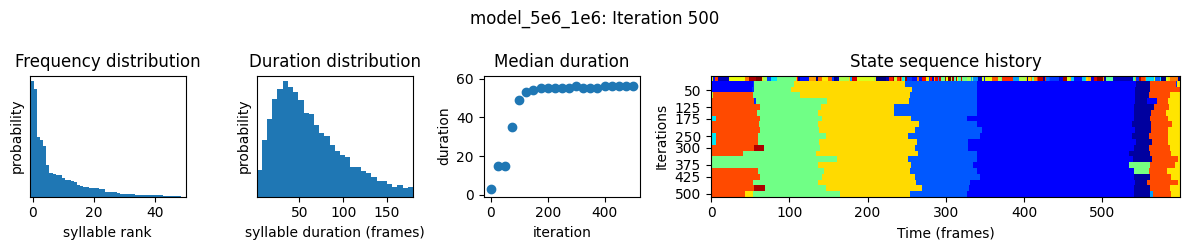

 95%|█████████████████████████████▍ | 475/501 [1:26:32<04:41, 10.84s/it]

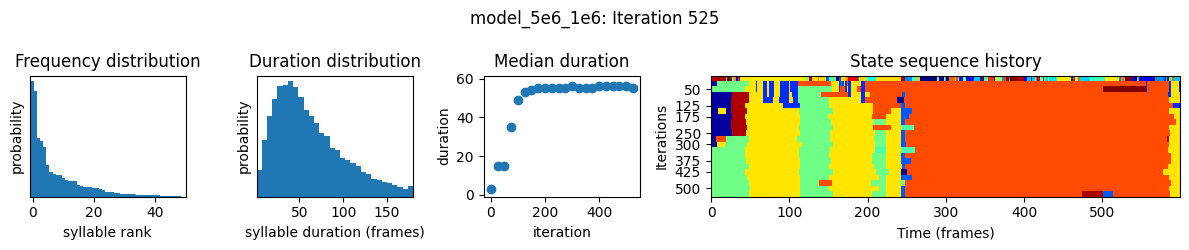

100%|██████████████████████████████▉| 500/501 [1:31:04<00:10, 10.86s/it]

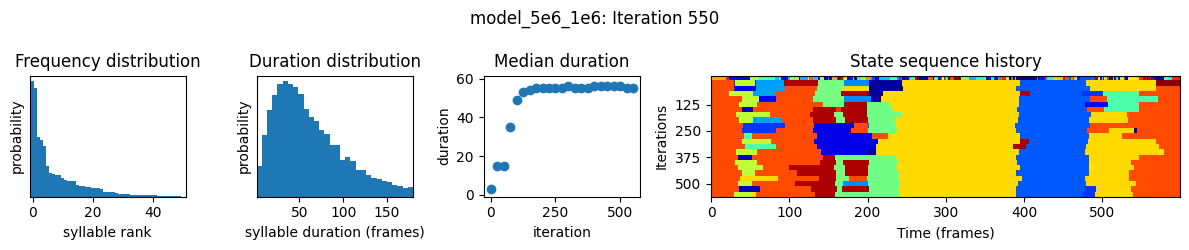

100%|███████████████████████████████| 501/501 [1:31:16<00:00, 10.93s/it]


In [22]:
# modify kappa to maintain the desired syllable time-scale
model = kpms.update_hypparams(model, kappa=1e6)

# run fitting for an additional 500 iters
model = kpms.fit_model(
    model, data, metadata, project_dir, model_name="model_5e6_1e6", ar_only=False, #2e4 in this line refers to AR-HMM model
    start_iter=current_iter, num_iters=current_iter+500)[0]

In [27]:
# modify a saved checkpoint so syllables are ordered by frequency
kpms.reindex_syllables_in_checkpoint(project_dir, model_name="model_5e6_1e6");

Reindexing: 100%|███████████| 23/23 [00:06<00:00,  3.46model snapshot/s]


In [6]:
# load the most recent model checkpoint
model, data, metadata, current_iter = kpms.load_checkpoint(project_dir, model_name="model_5e6_1e6")

# extract results
results = kpms.extract_results(model, metadata, project_dir, model_name="model_5e6_1e6")

Saved results to
/home/nj35/MRes/moseq_project/OFT_model/model_5e6_1e6/results.h5


Saving trajectory plots to /home/nj35/MRes/moseq_project/OFT_model/model_5e6_1e6/trajectory_plots


Generating trajectory plots: 100%|██████| 29/29 [00:11<00:00,  2.50it/s]


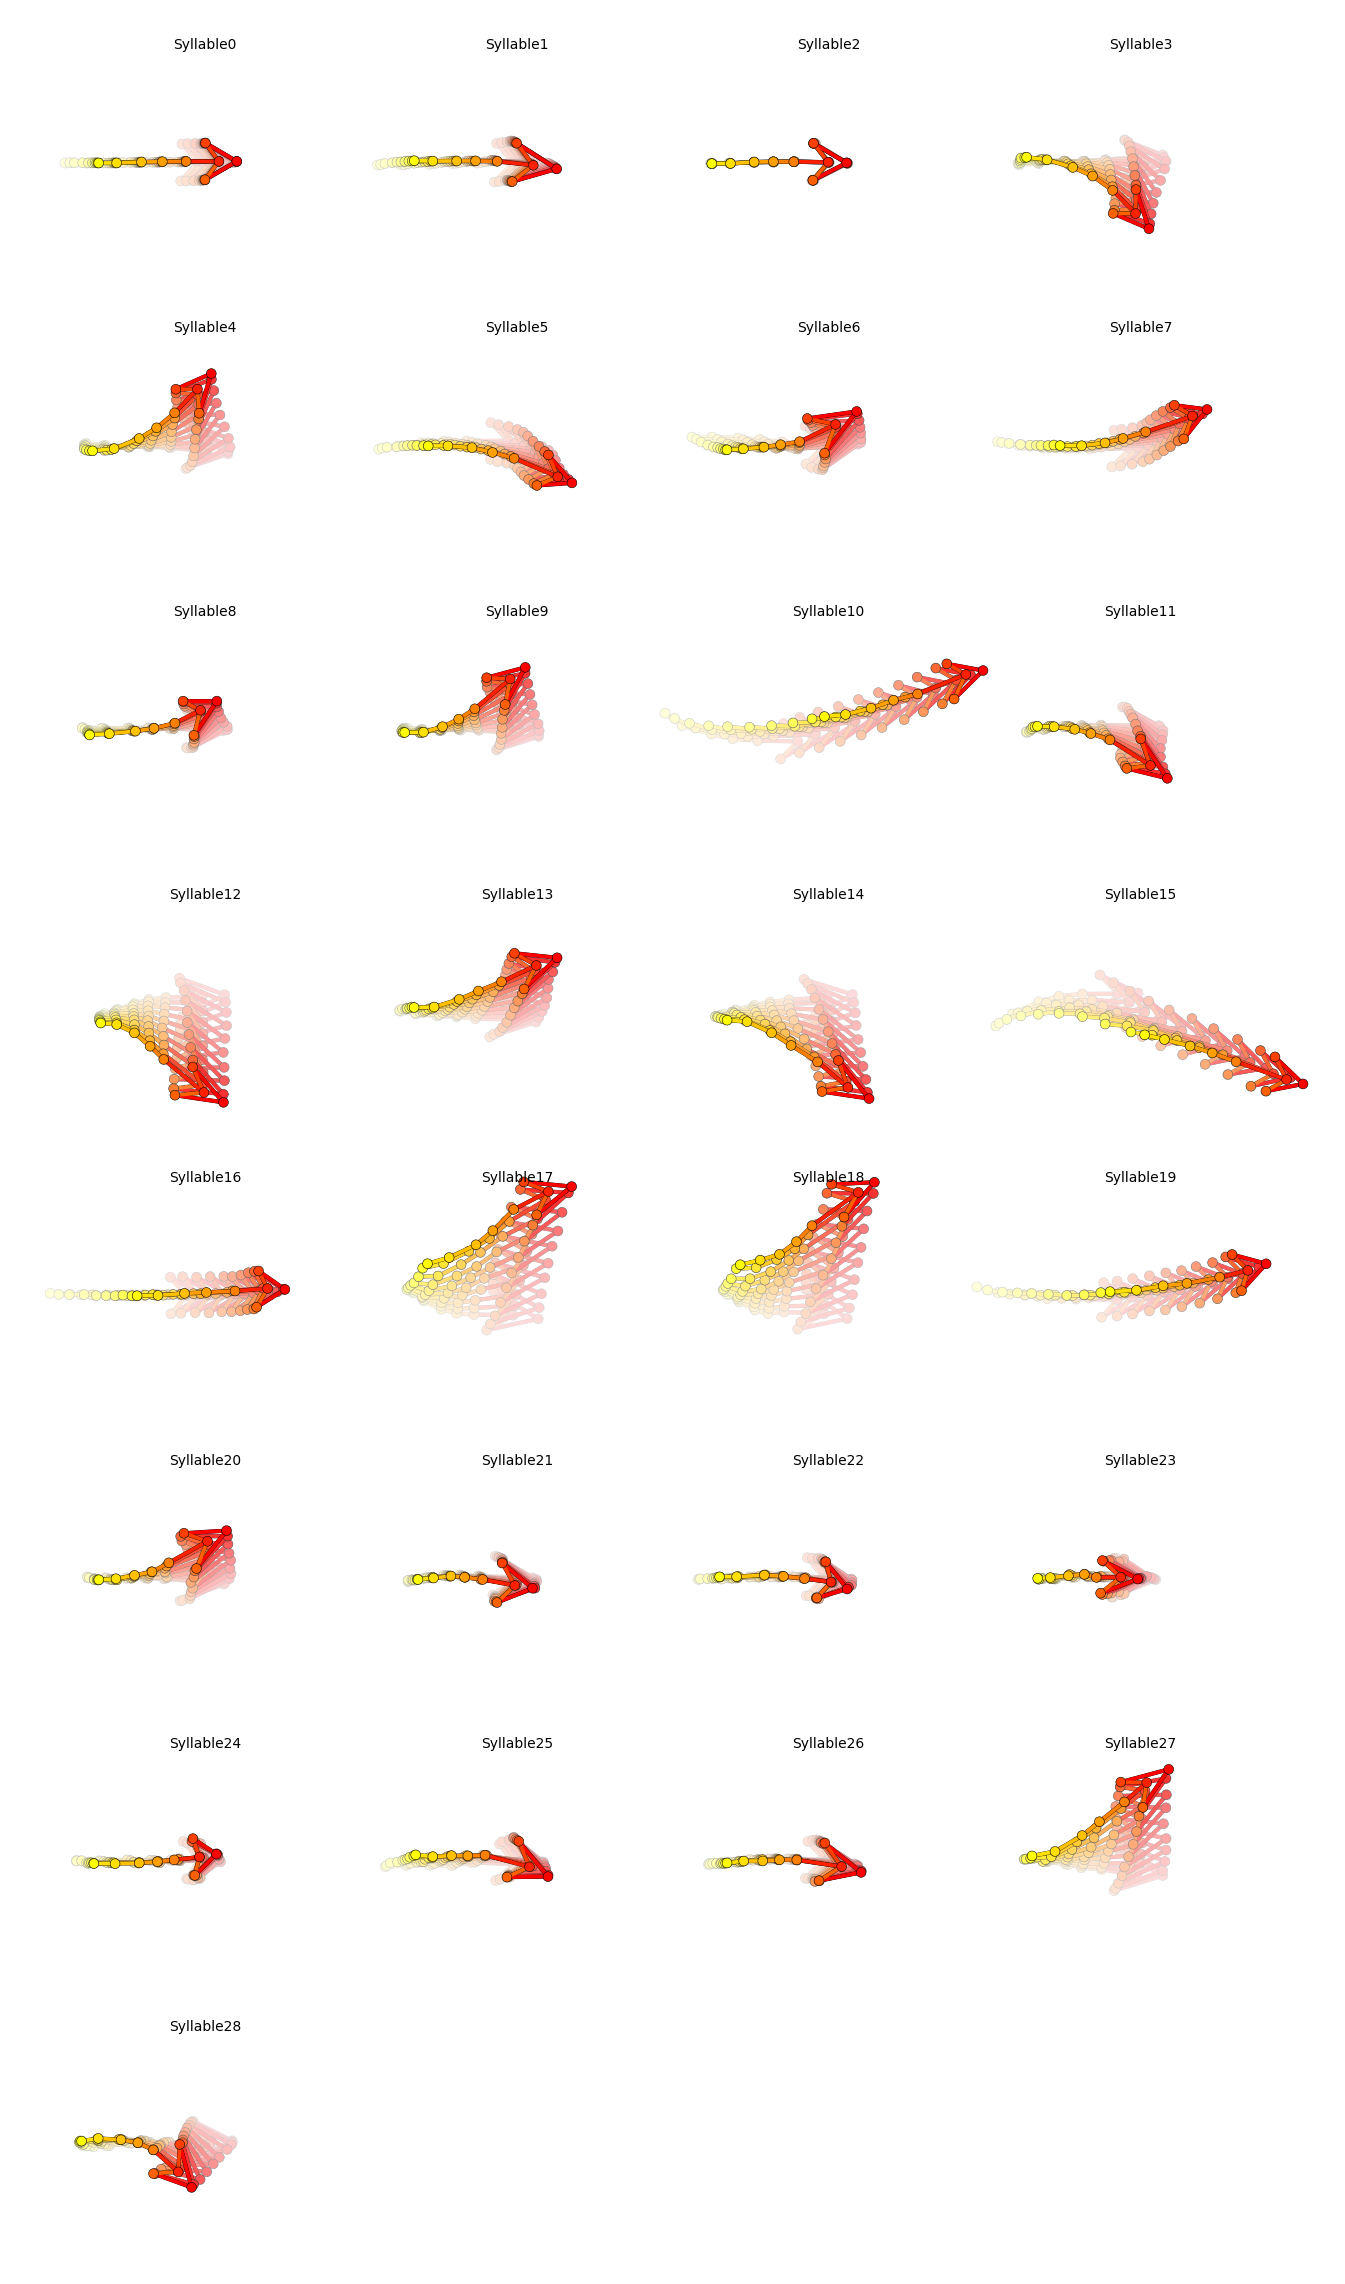

In [25]:
results = kpms.load_results(project_dir, model_name="model_5e6_1e6")
kpms.generate_trajectory_plots(coordinates, results, project_dir, model_name="model_5e6_1e6",  density_sample=False, **config())

In [28]:
# Generate video clips showing examples of each syllable, only works for 2D keypoints
#Caleb suggests pre=50 and post=100 due to 50fps
kpms.generate_grid_movies(
    results, 
    project_dir, 
    model_name="model_5e6_1e6", 
    coordinates=coordinates, 
    pre=50, 
    post=100, 
    **config()
);

Writing grid movies to /home/nj35/MRes/moseq_project/OFT_model/model_5e6_1e6/grid_movies


/home/nj35/miniforge3/envs/keypoint_moseq/lib/python3.9/site-packages/keypoint_moseq/viz.py:1282: UserWarning:


Videos will be downscaled by a factor of 0.67 so that the grid movies
are under 1920 pixels. Use `max_video_size` to increase or decrease
this size limit.





Using window size of 480 pixels


Generating grid movies: 100%|███████████| 29/29 [05:33<00:00, 11.50s/it]


Saving dendrogram plot to /home/nj35/MRes/moseq_project/OFT_model/model_5e6_1e6/similarity_dendrogram


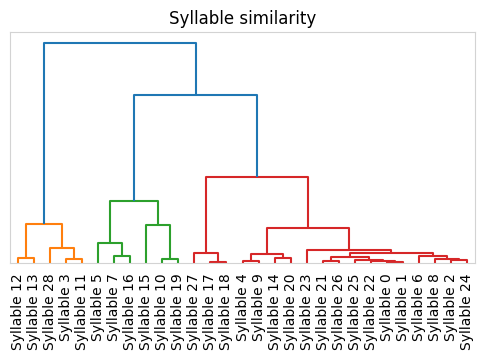

In [12]:
# Plot a dendrogram representing distances between each syllable’s median trajectory.
kpms.plot_similarity_dendrogram(coordinates, results, project_dir, model_name="model_5e6_1e6", **config())

In [13]:
kpms.interactive_group_setting(project_dir, model_name="model_5e6_1e6")

Row
    [0] Tabulator(editors={'name': None, ...}, show_index=False, titles={'name': 'recording name',...}, value=              ..., widths={'name': 400})
    [1] Column
        [0] Button(button_type='primary', name='Save group info')

In [6]:
moseq_OFT = kpms.compute_moseq_df(project_dir, model_name="model_5e6_1e6", fps=50, smooth_heading=True) 
moseq_OFT

,name,centroid_x,centroid_y,heading,angular_velocity,velocity_px_s,syllable,frame_index,group,onset
0,post-induction-w1_OFT_fixed_Trial 1 - crop_sup...,705.121867,399.203953,1.737818,0.000000,0.000000,0,0,post_w1,True
1,post-induction-w1_OFT_fixed_Trial 1 - crop_sup...,705.791181,398.553435,1.736888,-0.043885,46.667849,0,1,post_w1,False
2,post-induction-w1_OFT_fixed_Trial 1 - crop_sup...,705.457899,398.556654,1.736888,-0.085591,16.664888,0,2,post_w1,False
3,post-induction-w1_OFT_fixed_Trial 1 - crop_sup...,705.955095,398.195301,1.736888,-0.123257,30.731920,0,3,post_w1,False
4,post-induction-w1_OFT_fixed_Trial 1 - crop_sup...,706.531015,398.982638,1.722181,-0.155640,48.774593,0,4,post_w1,False
...,...,...,...,...,...,...,...,...,...,...
1110732,pre-induction_OFT_trial_4_superanimal_topviewm...,83.704898,131.423394,3.135953,-1.859549,142.995938,1,30029,control,False
1110733,pre-induction_OFT_trial_4_superanimal_topviewm...,84.947334,133.375014,3.097200,-1.630868,115.677017,1,30030,control,False
1110734,pre-induction_OFT_trial_4_superanimal_topviewm...,86.439425,135.076241,3.055212,312.848986,113.142709,1,30031,control,False
1110735,pre-induction_OFT_trial_4_superanimal_topviewm...,86.962587,137.653872,3.055212,-0.913774,131.509316,1,30032,control,False


In [7]:
# summary statistics for each syllable in each recording session, 
# such as its usage frequency and its distribution of kinematic parameters.

model_name='model_5e6_1e6'

moseq_OFT_stats = kpms.compute_stats_df(
    project_dir,
    'model_5e6_1e6',
    moseq_OFT, #change to df created in step before
    groupby=['group', 'name'],
    min_frequency=0.005, # threshold frequency for including a syllable in the dataframe# column(s) to group the dataframe by
    fps=50) # frame rate of the video from which keypoints were inferred                    

moseq_OFT_stats

,group,name,syllable,heading_mean,heading_std,heading_min,heading_max,angular_velocity_mean,angular_velocity_std,angular_velocity_min,angular_velocity_max,velocity_px_s_mean,velocity_px_s_std,velocity_px_s_min,velocity_px_s_max,frequency,duration
0,control,pre-induction_OFT_fixed_Trial 1 - crop_superan...,0,0.221582,1.725189,-3.139568,3.136401,0.474594,14.659822,-313.523970,313.919921,89.002061,96.895956,0.810496,560.820614,0.155361,1.286479
1,control,pre-induction_OFT_fixed_Trial 1 - crop_superan...,1,-0.363954,1.766881,-3.130443,3.134795,-0.284077,14.427606,-312.522332,312.950925,77.295719,58.179038,1.568747,480.852270,0.140044,1.174688
2,control,pre-induction_OFT_fixed_Trial 1 - crop_superan...,2,-0.437061,1.782361,-3.141507,3.136216,-0.190254,15.025167,-314.088806,314.033479,39.680610,41.208239,0.670539,446.566943,0.098468,0.970222
3,control,pre-induction_OFT_fixed_Trial 1 - crop_superan...,3,-0.062838,1.606912,-3.140217,3.113098,0.844873,15.649346,-310.760527,7.283047,160.560025,120.202904,0.586980,624.206627,0.085339,0.819487
4,control,pre-induction_OFT_fixed_Trial 1 - crop_superan...,4,-0.611796,1.605843,-3.137995,3.124738,0.063363,21.158167,-8.317509,313.641977,188.052929,126.514267,5.501380,593.098446,0.061269,0.778571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,post_w2,post_w2_OFT_trial_1_(cohort_2)_superanimal_top...,22,-1.765669,0.620598,-2.910599,-0.418049,1.129381,0.853167,-0.536928,2.867914,59.816727,31.940164,7.172620,144.116473,0.005405,0.940000
973,post_w2,post_w2_OFT_trial_1_(cohort_2)_superanimal_top...,23,-0.845619,1.015811,-2.040756,2.736970,0.079227,1.424125,-2.666791,2.963730,66.487734,33.887632,6.618653,162.479935,0.013514,0.436000
974,post_w2,post_w2_OFT_trial_1_(cohort_2)_superanimal_top...,25,1.080951,0.357602,0.144119,1.871472,0.060904,0.950620,-2.894797,2.638244,78.111622,50.330994,6.477858,384.608505,0.010811,1.845000
975,post_w2,post_w2_OFT_trial_1_(cohort_2)_superanimal_top...,26,0.136067,1.368860,-1.547833,1.791028,0.429653,1.014509,-1.252181,2.446449,53.933726,30.821042,16.677119,147.330786,0.005405,0.720000


In [8]:
# optional
#save moseq dataframe
save_dir0 = '/home/nj35/MRes/moseq_project/OFT_model/model_5e6_1e6'
moseq_OFT.to_csv('/home/nj35/MRes/moseq_project/OFT_model/model_5e6_1e6/moseq_OFT.csv', index=False)
print('Saved `moseq_OFT` dataframe to', save_dir0)

Saved `moseq_OFT` dataframe to /home/nj35/MRes/moseq_project/OFT_model/model_5e6_1e6


In [9]:
#save moseq stats_df
save_dir1 = '/home/nj35/MRes/moseq_project/OFT_model/model_5e6_1e6'
moseq_OFT_stats.to_csv('/home/nj35/MRes/moseq_project/OFT_model/model_5e6_1e6/moseq_OFT_stats.csv', index=False)
print('Saved `moseq_OFT_stats` dataframe to', save_dir1)

Saved `moseq_OFT_stats` dataframe to /home/nj35/MRes/moseq_project/OFT_model/model_5e6_1e6


In [18]:
kpms.label_syllables(project_dir, model_name= "model_5e6_1e6", moseq_df=moseq_OFT)

Row
    [0] Column
        [0] Select(options=[0, 1, 2, 3, 4, ...], value=0)
        [1] ParamFunction(function, _pane=Video)
    [1] Column
        [0] Tabulator(editors={'name': None, ...}, show_index=False, titles={'syllable': 'syllable', ...}, value=    syllable l..., widths={'syllable': 100})
        [1] Column
            [0] Button(button_type='primary', name='Save syllable info')

/home/nj35/miniforge3/envs/keypoint_moseq/lib/python3.9/site-packages/seaborn/_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/home/nj35/miniforge3/envs/keypoint_moseq/lib/python3.9/site-packages/seaborn/_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/home/nj35/miniforge3/envs/keypoint_moseq/lib/python3.9/site-packages/seaborn/_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Saved figure to /home/nj35/MRes/moseq_project/OFT_model/model_5e6_1e6/figures/frequency_stat_stats.png


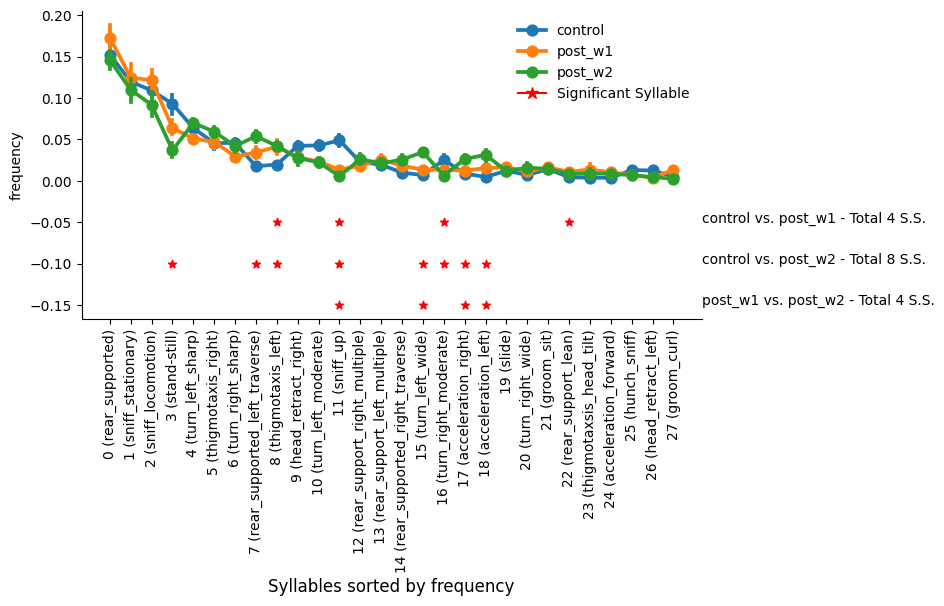

In [16]:
model_name="model_5e6_1e6"

kpms.plot_syll_stats_with_sem(
    moseq_OFT_stats,
    project_dir,
    model_name,
    plot_sig=True,  # whether to mark statistical significance with a star
    thresh=0.05,  # significance threshold
    stat="frequency",  # statistic to be plotted (e.g. 'duration' or 'velocity_px_s_mean')
    order="stat",  # order syllables by overall frequency ("stat") or degree of difference ("diff")
    #ctrl_group="a",  # name of the control group for statistical testing
    #exp_group="b",  # name of the experimental group for statistical testing
    figsize=(8, 4),  # figure size
    groups=moseq_OFT_stats["group"].unique(),  # groups to be plotted
);

In [ ]:
#Add cohort 2+3 new data
#When running "apply_model",  we recommend applying to both the new and old data, so for now you can fix both issues by 
#(1) applying the model to all your data (new and old); (2) deleting the old index file.

In [6]:
#load data (e.g from DeepLabCut)
new_data_oft = [
    '/home/nj35/MRes/TDP videos/Cohort 1/pre-induction/OFT/crop',
    '/home/nj35/MRes/TDP videos/Cohort 1/post-induction-w1/OFT/crop',
    '/home/nj35/MRes/TDP videos/Cohort 1/post-induction-w2/OFT/crop',
    '/home/nj35/MRes/TDP videos/Cohort 3/pre-induction/OFT/crop',
    '/home/nj35/MRes/TDP videos/Cohort 3/post-induction-w1/OFT/crop',
    '/home/nj35/MRes/TDP videos/Cohort 3/post-induction-w2/OFT/crop'
] # can be a file, a directory, or a list of files

In [7]:
# Function to find all .h5 files in specified directories
def find_h5_files(new_data_oft):
    h5_files = []  
    for directory in new_data_oft:
        pattern = os.path.join(directory, '*.h5')  # Look only in the specified folders (no recursion)
        h5_files.extend(glob.glob(pattern))  
    return h5_files

In [ ]:
# Get list of .h5 files from the given directories
h5_files = find_h5_files(new_data_oft)
print(f"Number of .h5 files found: {len(h5_files)}")
print("Found .h5 files:", h5_files)
#should be 12 for OFT

In [ ]:
# Process each .h5 file: filter and overwrite it in the same location
for h5_file_oft in h5_files:
    try:
        print(f"Processing: {h5_file_oft}")

        # Load the existing .h5 file
        df_oft = pd.read_hdf(h5_file_oft)

        # Apply filtering: Keep only 'animal0'
        df_filtered_oft = df_oft.loc[:, df_oft.columns.get_level_values('individuals') == 'animal0']

        # Overwrite the same file with filtered data
        df_filtered_oft.to_hdf(h5_file_oft, key='df', mode='w')

        print(f"Filtered and saved: {h5_file_oft}")

    except Exception as e:
        print(f"Error processing {h5_file_oft}: {e}")

In [10]:
# load the most recent model checkpoint and pca object
model = kpms.load_checkpoint(project_dir, model_name="model_5e6_1e6")[0]

In [11]:
### Caleb's advice for excluding likelihoods <0.3 including when mouse in in dark and not recognised

coordinates, confidences, bodyparts = kpms.load_keypoints(keypoint_data_path, 'deeplabcut', recursive=False, extension='.h5')

coordinates = {k : np.where(confidences[k][:,:,None] < 0.3, np.nan, coordinates[k]) for k in coordinates} #changes values less than 0.6 to NaN
#format data
data, metadata = kpms.format_data(coordinates, confidences, **config()) #format data for analysing

Loading keypoints: 100%|████████████████| 37/37 [00:01<00:00, 32.47it/s]


In [13]:
# apply saved model to new data
#or to NOT overwrite current results file
#new_results = kpms.apply_model(model, data, metadata, project_dir, model_name="model_5e6_1e6", **config())
# orrrr just rename original .h5 file so it does not overwrite!
results = kpms.apply_model(model, data, metadata, project_dir, model_name="model_5e6_1e6", **config())

Applying model: 100%|███████████████| 500/500 [1:13:39<00:00,  8.84s/it]


Saved results to
/home/nj35/MRes/moseq_project/OFT_model/model_5e6_1e6/results.h5


In [14]:
# optionally rerun `save_results_as_csv` to export the new results
kpms.save_results_as_csv(results, project_dir, model_name="model_5e6_1e6")

Saving to csv: 100%|████████████████████| 37/37 [00:04<00:00,  8.59it/s]


In [15]:
kpms.interactive_group_setting(project_dir, model_name="model_5e6_1e6")

Row
    [0] Tabulator(editors={'name': None, ...}, show_index=False, titles={'name': 'recording name',...}, value=              ..., widths={'name': 400})
    [1] Column
        [0] Button(button_type='primary', name='Save group info')

In [17]:
moseq_OFT_new = kpms.compute_moseq_df(project_dir, model_name="model_5e6_1e6", fps=50, smooth_heading=True) 
moseq_OFT_new

,name,centroid_x,centroid_y,heading,angular_velocity,velocity_px_s,syllable,frame_index,group,onset
0,post-induction-w1_OFT_fixed_Trial 1 - crop_sup...,704.735966,402.054591,1.712176,0.000000,0.000000,1,0,post_w1,True
1,post-induction-w1_OFT_fixed_Trial 1 - crop_sup...,706.105126,401.485641,1.761608,-0.074764,74.133420,1,1,post_w1,False
2,post-induction-w1_OFT_fixed_Trial 1 - crop_sup...,706.175108,400.091975,1.761608,-0.150467,69.771111,1,2,post_w1,False
3,post-induction-w1_OFT_fixed_Trial 1 - crop_sup...,706.985336,399.539833,1.734143,-0.221699,49.023687,1,3,post_w1,False
4,post-induction-w1_OFT_fixed_Trial 1 - crop_sup...,706.157469,399.951737,1.719454,-0.276500,46.233873,1,4,post_w1,False
...,...,...,...,...,...,...,...,...,...,...
1110732,pre-induction_OFT_trial_4_superanimal_topviewm...,83.962841,130.668804,3.134937,-1.936629,140.411936,0,30029,control,False
1110733,pre-induction_OFT_trial_4_superanimal_topviewm...,84.711727,133.512970,3.112948,312.458486,147.055342,0,30030,control,False
1110734,pre-induction_OFT_trial_4_superanimal_topviewm...,85.707013,135.251448,3.032606,-1.377852,100.161161,0,30031,control,False
1110735,pre-induction_OFT_trial_4_superanimal_topviewm...,86.558520,137.740277,3.032606,-0.971722,131.523132,0,30032,control,False


In [18]:
# summary statistics for each syllable in each recording session, 
# such as its usage frequency and its distribution of kinematic parameters.

model_name='model_5e6_1e6'

moseq_OFT_stats_new = kpms.compute_stats_df(
    project_dir,
    'model_5e6_1e6',
    moseq_OFT_new, #change to df created in step before
    groupby=['group', 'name'],
    min_frequency=0.005, # threshold frequency for including a syllable in the dataframe# column(s) to group the dataframe by
    fps=50) # frame rate of the video from which keypoints were inferred                    

moseq_OFT_stats_new

,group,name,syllable,heading_mean,heading_std,heading_min,heading_max,angular_velocity_mean,angular_velocity_std,angular_velocity_min,angular_velocity_max,velocity_px_s_mean,velocity_px_s_std,velocity_px_s_min,velocity_px_s_max,frequency,duration
0,control,pre-induction_OFT_fixed_Trial 1 - crop_superan...,0,-0.171577,1.707440,-3.140072,3.137402,-0.198764,15.634396,-312.688701,313.772055,74.872338,51.840094,1.483829,470.838398,0.167059,1.130141
1,control,pre-induction_OFT_fixed_Trial 1 - crop_superan...,1,-0.178907,1.714847,-3.141164,3.141526,0.068339,16.390861,-314.114093,314.122959,78.345994,93.505465,1.082375,507.893138,0.112941,1.375833
2,control,pre-induction_OFT_fixed_Trial 1 - crop_superan...,2,-0.400281,1.582138,-3.135474,3.139663,0.140295,11.045829,-313.441331,313.469338,118.873477,105.904382,0.616801,579.392645,0.129412,2.057091
3,control,pre-induction_OFT_fixed_Trial 1 - crop_superan...,3,-0.461219,1.886987,-3.138816,3.141526,-0.023495,16.277199,-314.049694,313.288277,41.155161,51.628569,0.778673,466.189272,0.070588,0.990667
4,control,pre-induction_OFT_fixed_Trial 1 - crop_superan...,4,-0.736770,1.418278,-3.140030,3.140670,-0.456266,15.834435,-5.801278,312.718350,174.016744,112.779084,4.179310,555.635292,0.080000,0.920000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,post_w2,post_w2_OFT_trial_1_(cohort_2)_superanimal_top...,17,0.917120,1.491513,-3.032574,2.088624,0.178654,1.233455,-3.050202,3.629916,332.967780,144.467447,3.896584,611.249239,0.014706,1.263333
794,post_w2,post_w2_OFT_trial_1_(cohort_2)_superanimal_top...,18,0.044932,1.547321,-2.962627,2.200320,-1.002731,0.909890,-3.278587,0.855193,270.468045,124.650220,19.089662,544.634487,0.014706,1.350000
795,post_w2,post_w2_OFT_trial_1_(cohort_2)_superanimal_top...,20,1.510901,0.884010,-0.601380,2.805006,1.128297,1.290467,-1.096905,4.663907,395.318329,137.405675,2.845733,642.824037,0.004902,1.560000
796,post_w2,post_w2_OFT_trial_1_(cohort_2)_superanimal_top...,21,-1.041574,0.722674,-2.201345,-0.026033,-0.053136,0.710458,-1.547587,1.965310,58.542470,36.741745,0.839610,198.556611,0.007353,0.833333


In [19]:
# optional
#save moseq dataframe
save_dir0 = '/home/nj35/MRes/moseq_project/OFT_model/model_5e6_1e6'
moseq_OFT_new.to_csv('/home/nj35/MRes/moseq_project/OFT_model/model_5e6_1e6/moseq_OFT_new.csv', index=False)
print('Saved `moseq_OFT_new` dataframe to', save_dir0)

Saved `moseq_OFT_new` dataframe to /home/nj35/MRes/moseq_project/OFT_model/model_5e6_1e6


In [20]:
#save moseq stats_df
save_dir1 = '/home/nj35/MRes/moseq_project/OFT_model/model_5e6_1e6'
moseq_OFT_stats_new.to_csv('/home/nj35/MRes/moseq_project/OFT_model/model_5e6_1e6/moseq_OFT_stats_new.csv', index=False)
print('Saved `moseq_OFT_stats_new` dataframe to', save_dir1)

Saved `moseq_OFT_stats_new` dataframe to /home/nj35/MRes/moseq_project/OFT_model/model_5e6_1e6


/home/nj35/miniforge3/envs/keypoint_moseq/lib/python3.9/site-packages/seaborn/_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/home/nj35/miniforge3/envs/keypoint_moseq/lib/python3.9/site-packages/seaborn/_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/home/nj35/miniforge3/envs/keypoint_moseq/lib/python3.9/site-packages/seaborn/_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Saved figure to /home/nj35/MRes/moseq_project/OFT_model/model_5e6_1e6/figures/frequency_stat_stats.png


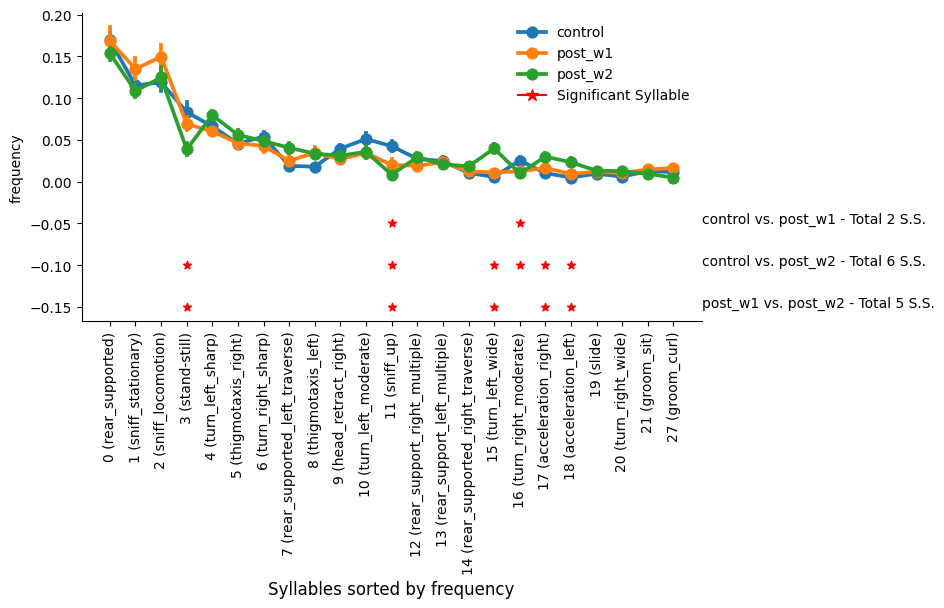

In [22]:
model_name="model_5e6_1e6"

kpms.plot_syll_stats_with_sem(
    moseq_OFT_stats_new,
    project_dir,
    model_name,
    plot_sig=True,  # whether to mark statistical significance with a star
    thresh=0.05,  # significance threshold
    stat="frequency",  # statistic to be plotted (e.g. 'duration' or 'velocity_px_s_mean')
    order="stat",  # order syllables by overall frequency ("stat") or degree of difference ("diff")
    #ctrl_group="a",  # name of the control group for statistical testing
    #exp_group="b",  # name of the experimental group for statistical testing
    figsize=(8, 4),  # figure size
    groups=moseq_OFT_stats_new["group"].unique(),  # groups to be plotted
);

In [7]:
# optionally rerun `save_results_as_csv` to export the new results
kpms.save_results_as_csv(results, project_dir, model_name="model_5e6_1e6")

Saving to csv: 100%|████████████████████| 37/37 [00:04<00:00,  8.76it/s]
